In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from ast import literal_eval

In [2]:
samples = pd.read_csv('../../data/Custom/combined_2.csv')
samples = samples.drop('Unnamed: 0', axis=1)
display(samples)

,index,Title,180 Usage,Addresses,Article Number,Authors,Authors (Full),Class,DOI,Document Type,...,Total Cited (all db),Usage Since 2013,Volume,Abstract Column,Cited References,Export Date,idk,Issue,Book Editors,DOI2
0,0,Editorial: Physical neuromorphic computing and...,4,"['[Yamane, Toshiyuki] IBM Res Tokyo, Tokyo, Ja...",1238168,"['Yamane, T', 'Hirose, A', 'Offrein, BJ']","['Yamane, Toshiyuki', 'Hirose, Akira', 'Offrei...",N,10.3389/fninf.2023.1238168,Editorial Material,...,0,4,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Neuromorphic Hardware Based on Artificial Syna...,10,"['[Li, J.; Zhao, C.] Xian Jiaotong Liverpool U...",NaN,"['Li, J', 'Zhao, C', 'Man, K']","['Li, J.', 'Zhao, C.', 'Man, K.', 'GP IEEE']",N,10.1109/ISOCC56007.2022.10031458,"['Proceedings Paper', 'CT 19th International S...",...,0,10,NaN,Inspired by the structure and functions of the...,"['10.1038/nature03010', '10.1146/annurev.neuro...",NaN,188,NaN,NaN,NaN
2,3,Opportunities for neuromorphic computing algor...,6,"['[Schuman, Catherine D.; Kulkarni, Shruti R.;...",NaN,"['Schuman, CD', 'Kulkarni, SR', 'Parsa, M', 'M...","['Schuman, Catherine D.', 'Kulkarni, Shruti R....",N,10.1038/s43588-021-00184-y,"['Article', 'ID NEURAL-NETWORK ARCHITECTURE; C...",...,106,19,2,Neuromorphic computing technologies will be im...,"['Aimone J. B., 2018, P 3 INT WORKSHOP POS, P2...",NaN,19,1,NaN,NaN
3,5,Heterogeneously Integrated III-V on Silicon Ph...,1,"['[Tossoun, Bassem; Jha, Aashu; Giamougiannis,...",NaN,"['Tossoun, B', 'Jha, A', 'Giamougiannis, G', '...","['Tossoun, Bassem', 'Jha, Aashu', 'Giamougiann...",N,10.1109/SUM57928.2023.10224393,"['Proceedings Paper', 'CT IEEE-Photonics-Socie...",...,0,1,NaN,"At Hewlett Packard Labs, an energy-efficient, ...","['Babbage Charles, 2022, PASSAGES LIFE PHILOS'...",NaN,NaN,NaN,NaN,NaN
4,6,Editorial: Focus on algorithms for neuromorphi...,1,"['[Legenstein, Robert] Graz Univ Technol, Graz...",030402,"['Legenstein, R', 'Basu, A', 'Panda, P']","['Legenstein, Robert', 'Basu, Arindam', 'Panda...",N,10.1088/2634-4386/ace991,Editorial Material,...,0,1,3,Neuromorphic computing provides a promising en...,"['10.1088/2634-4386/ac9899', '10.1088/2634-438...",NaN,NaN,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,16265,Design of an electronic synapse with spike tim...,0,"['[Hu, S. G.; Wu, H. T.; Liu, Y.; Yu, Q.] Univ...",114502,"['Hu, SG', 'Wu, HT', 'Liu, Y', 'Chen, TP', 'Li...","['Hu, S. G.', 'Wu, H. T.', 'Liu, Y.', 'Chen, T...",S,10.1063/1.4795280,Article,...,16,89,113,This paper presents a design of electronic syn...,"['10.1146/annurev.neuro.24.1.139', '10.1523/jn...",NaN,NaN,11,NaN,NaN
13856,16266,Network Architecture Producing Swing to Stance...,0,"['[Strohmer, Beck; Manoonpong, Poramate; Larse...",818449,"['Strohmer, B', 'Mantziaris, C', 'Kynigopoulos...","['Strohmer, Beck', 'Mantziaris, Charalampos', ...",S,10.3389/finsc.2022.818449,Article,...,0,0,2,The walking system of the stick insect is one ...,"['10.1523/JNEUROSCI.5202-06.2007', '10.3389/fn...",NaN,NaN,NaN,NaN,NaN
13857,16268,Hippocampus Function Modeling With Neural Network,4,[Zhao Wang-xiong; Qiao Qing-li; Wang Dan] Tian...,NaN,"['Zhao, WX', 'Qiao, QL', 'Wang, D']","['Zhao Wang-xiong', 'Qiao Qing-li', 'Wang Dan']",S,10.1109/ITIME.2009.5236247,"['Proceedings Paper', 'CT IEEE International S...",...,0,20,NaN,The hippocampus and associative structures are...,"['10.1098/rstb.1994.0019', 'DAVID DV, 1998, NE...",NaN,1131,NaN,"['Liu, H', 'Zheng, XG']",NaN
13858,16269,An online supervised learning method based on ...,1,"['[Xu, Yan] Nanjing Agr Univ, Coll Informat Sc...",NaN,"['Xu, Y', 'Yang, J', 'Zhong, SM']","['Xu, Yan', 'Yang, Jing', 'Zhong, Shuiming']",S,10.1016/j.neunet.2017.04.010,Article,...,17,44,93,The purpose of supervised learning with tempor...,"['[Anonymous], THESIS', '[Anonymous], 1996, NE...",NaN,20,NaN,NaN,NaN


In [3]:
edges = pd.read_csv('../../data/Custom/combined_edges2.csv')
edges = edges.drop('Unnamed: 0', axis=1)
display(edges)
# DOI is node, class is classification, and cited references show edges

,DOI,Cited References
0,10.1109/ISOCC56007.2022.10031458,10.1038/nature03010
1,10.1109/ISOCC56007.2022.10031458,10.1146/annurev.neuro.31.060407.125639
2,10.1109/ISOCC56007.2022.10031458,"Goodfellow I, 2016, ADAPT COMPUT MACH LE, P1"
3,10.1109/ISOCC56007.2022.10031458,10.1038/s41928-021-00646-1
4,10.1109/ISOCC56007.2022.10031458,"HEBB D. O., 1949"
...,...,...
644234,10.1016/j.biosystems.2013.03.018,10.1146/annurev.ne.18.030195.003011
644235,10.1016/j.biosystems.2013.03.018,10.1155/2011/683961
644236,10.1016/j.biosystems.2013.03.018,"Von der Malsburg C, 2001, INT ENCY SOCIAL BEHA..."
644237,10.1016/j.biosystems.2013.03.018,10.1109/ICNN.1996.549005


In [4]:
data = samples[['DOI','Class']].copy()
data = data.drop_duplicates('DOI')
data = data.reset_index()
display(data)

,index,DOI,Class
0,0,10.3389/fninf.2023.1238168,N
1,1,10.1109/ISOCC56007.2022.10031458,N
2,2,10.1038/s43588-021-00184-y,N
3,3,10.1109/SUM57928.2023.10224393,N
4,4,10.1088/2634-4386/ace991,N
...,...,...,...
13794,13855,10.1063/1.4795280,S
13795,13856,10.3389/finsc.2022.818449,S
13796,13857,10.1109/ITIME.2009.5236247,S
13797,13858,10.1016/j.neunet.2017.04.010,S


In [5]:
wos_cites = pd.read_csv('../../data/Custom/combined_edges2.csv',names=['target','source'])
# wos_cites.drop(0)
# display(wos_cites)
# wos_cites = edges

wos_content = pd.read_csv('../../data/Custom/combined_cites2.csv')
wos_content = wos_content[wos_content['paper_id'].notna()]
# wos_content
# display(wos_content)

column_names = ["paper_id"] + ["class_label"] + [word for word in wos_content['keyword'].unique()]
wos_paper = pd.read_csv('../../data/Custom/combined_2.csv',names=column_names)
wos_paper = wos_paper.drop_duplicates('paper_id')
wos_paper = wos_paper.reset_index()
wos_paper = data.drop('index',axis=1)
# wos_paper = wos_paper.drop(0)
# display(wos_paper)


# wos_cites = pd.read_csv('../../data/Custom/wos.cites.csv',names=['target','source'])
# # wos_cites.drop(0)
# # display(wos_cites)
# # wos_cites = edges

# wos_content = pd.read_csv('../../data/Custom/wos.content.csv')
# wos_content = wos_content[wos_content['paper_id'].notna()]
# # wos_content
# # display(wos_content)

# column_names = ["paper_id"] + ["class_label"] + [word for word in wos_content['word_cited_id'].unique()]
# wos_paper = pd.read_csv('../../data/Custom/wos.paper.csv',names=column_names)
# wos_paper = wos_paper.drop_duplicates('paper_id')
# wos_paper = wos_paper.reset_index()
# wos_paper = data.drop('index',axis=1)
# # wos_paper = wos_paper.drop(0)
# # display(wos_paper)

# wos_cites = wos_cites.drop(0)
# display(wos_cites)
# wos_paper = wos_paper.drop(0)
# # wos_paper.loc[wos_paper['Class'] == 'N', 'Class'] = 'Neuromorphic'
# # wos_paper = wos_paper.drop('index',axis=1)
# display(wos_paper)

c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1,3,5,13,16,19,20,21,22,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
wos_cites = wos_cites.drop(wos_cites.index[0])
display(wos_cites)
# wos_paper = wos_paper.drop(0)
# wos_paper.loc[wos_paper['Class'] == 'N', 'Class'] = 'Neuromorphic'
# wos_paper = wos_paper.drop('index',axis=1)
display(wos_paper)

,target,source
1.0,10.1109/ISOCC56007.2022.10031458,10.1038/nature03010
2.0,10.1109/ISOCC56007.2022.10031458,10.1146/annurev.neuro.31.060407.125639
3.0,10.1109/ISOCC56007.2022.10031458,"Goodfellow I, 2016, ADAPT COMPUT MACH LE, P1"
4.0,10.1109/ISOCC56007.2022.10031458,10.1038/s41928-021-00646-1
5.0,10.1109/ISOCC56007.2022.10031458,"HEBB D. O., 1949"
...,...,...
644354.0,10.1016/j.biosystems.2013.03.018,10.1146/annurev.ne.18.030195.003011
644355.0,10.1016/j.biosystems.2013.03.018,10.1155/2011/683961
644356.0,10.1016/j.biosystems.2013.03.018,"Von der Malsburg C, 2001, INT ENCY SOCIAL BEHA..."
644357.0,10.1016/j.biosystems.2013.03.018,10.1109/ICNN.1996.549005


,DOI,Class
0,10.3389/fninf.2023.1238168,N
1,10.1109/ISOCC56007.2022.10031458,N
2,10.1038/s43588-021-00184-y,N
3,10.1109/SUM57928.2023.10224393,N
4,10.1088/2634-4386/ace991,N
...,...,...
13794,10.1063/1.4795280,S
13795,10.3389/finsc.2022.818449,S
13796,10.1109/ITIME.2009.5236247,S
13797,10.1016/j.neunet.2017.04.010,S


In [8]:
print(len(wos_content['keyword'].unique()))

39622


In [9]:
wos_content = wos_content.drop('Unnamed: 0',axis=1)
display(wos_content)

,paper_id,keyword
0,10.3389/fninf.2023.1238168,analog neuromorphic devices
1,10.3389/fninf.2023.1238168,electric neuromorphic computing
2,10.3389/fninf.2023.1238168,material
3,10.3389/fninf.2023.1238168,neuromorphic computing
4,10.3389/fninf.2023.1238168,quantum neuromorphic computing
...,...,...
110415,10.1016/j.biosystems.2013.03.018,SYNCHRONIZATION
110416,10.1016/j.biosystems.2013.03.018,RETRIEVAL
110417,10.1016/j.biosystems.2013.03.018,PLACE
110418,10.1016/j.biosystems.2013.03.018,REPLAY


In [10]:
wos_paper = wos_paper.reset_index()
display(wos_paper)

,index,DOI,Class
0,0,10.3389/fninf.2023.1238168,N
1,1,10.1109/ISOCC56007.2022.10031458,N
2,2,10.1038/s43588-021-00184-y,N
3,3,10.1109/SUM57928.2023.10224393,N
4,4,10.1088/2634-4386/ace991,N
...,...,...,...
13794,13794,10.1063/1.4795280,S
13795,13795,10.3389/finsc.2022.818449,S
13796,13796,10.1109/ITIME.2009.5236247,S
13797,13797,10.1016/j.neunet.2017.04.010,S


In [11]:
wos_paper = wos_paper.set_index('DOI')
for word in wos_content['keyword'].unique():
    if word == 'Class' or word == 'index':
        continue
    wos_paper[word] = 0


c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [12]:
display(wos_paper)

,index,Class,analog neuromorphic devices,electric neuromorphic computing,material,neuromorphic computing,quantum neuromorphic computing,IoT and edge,computing,Artificial,...,INTER-LEG COORDINATION,THORACIC GANGLION;,STICK,hippocampus function,autoassociative memory;,heteroassociative memory,Real time error function,NEURAL-NETWORK MODELS,Memory of sequences,SELECTIVE ATTENTION MODEL
DOI,,,,,,,,,,,,,,,,,,,,,
10.3389/fninf.2023.1238168,0,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ISOCC56007.2022.10031458,1,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1038/s43588-021-00184-y,2,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/SUM57928.2023.10224393,3,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1088/2634-4386/ace991,4,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1063/1.4795280,13794,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.3389/finsc.2022.818449,13795,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ITIME.2009.5236247,13796,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
for index, row in wos_content.iterrows(): # mark as true for words used by each paper
    wos_paper.at[str(row['paper_id']), str(row['keyword'])] = 1


In [14]:
display(wos_paper)

,index,Class,analog neuromorphic devices,electric neuromorphic computing,material,neuromorphic computing,quantum neuromorphic computing,IoT and edge,computing,Artificial,...,INTER-LEG COORDINATION,THORACIC GANGLION;,STICK,hippocampus function,autoassociative memory;,heteroassociative memory,Real time error function,NEURAL-NETWORK MODELS,Memory of sequences,SELECTIVE ATTENTION MODEL
DOI,,,,,,,,,,,,,,,,,,,,,
10.3389/fninf.2023.1238168,0,N,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ISOCC56007.2022.10031458,1,N,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10.1038/s43588-021-00184-y,2,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/SUM57928.2023.10224393,3,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1088/2634-4386/ace991,4,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1063/1.4795280,13794,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.3389/finsc.2022.818449,13795,S,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
10.1109/ITIME.2009.5236247,13796,S,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [15]:
wos_paper = wos_paper.dropna()
display(wos_paper)

,index,Class,analog neuromorphic devices,electric neuromorphic computing,material,neuromorphic computing,quantum neuromorphic computing,IoT and edge,computing,Artificial,...,INTER-LEG COORDINATION,THORACIC GANGLION;,STICK,hippocampus function,autoassociative memory;,heteroassociative memory,Real time error function,NEURAL-NETWORK MODELS,Memory of sequences,SELECTIVE ATTENTION MODEL
DOI,,,,,,,,,,,,,,,,,,,,,
10.3389/fninf.2023.1238168,0,N,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ISOCC56007.2022.10031458,1,N,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10.1038/s43588-021-00184-y,2,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/SUM57928.2023.10224393,3,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1088/2634-4386/ace991,4,N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1063/1.4795280,13794,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.3389/finsc.2022.818449,13795,S,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
10.1109/ITIME.2009.5236247,13796,S,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [16]:
wos_paper = wos_paper.reset_index()
print(wos_paper.shape)
display(wos_paper)

(13799, 39623)


,DOI,index,Class,analog neuromorphic devices,electric neuromorphic computing,material,neuromorphic computing,quantum neuromorphic computing,IoT and edge,computing,...,INTER-LEG COORDINATION,THORACIC GANGLION;,STICK,hippocampus function,autoassociative memory;,heteroassociative memory,Real time error function,NEURAL-NETWORK MODELS,Memory of sequences,SELECTIVE ATTENTION MODEL
0,10.3389/fninf.2023.1238168,0,N,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10.1109/ISOCC56007.2022.10031458,1,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.1038/s43588-021-00184-y,2,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.1109/SUM57928.2023.10224393,3,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.1088/2634-4386/ace991,4,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,10.1063/1.4795280,13794,S,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13795,10.3389/finsc.2022.818449,13795,S,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
13796,10.1109/ITIME.2009.5236247,13796,S,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
13797,10.1016/j.neunet.2017.04.010,13797,S,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [18]:
wos_paper = wos_paper.drop('index', axis=1)

In [19]:
wos_cites = wos_cites[wos_cites['source'].isin(wos_paper['DOI'])]
wos_cites = wos_cites[wos_cites['target'].isin(wos_paper['DOI'])]

In [20]:
display(wos_cites)

,target,source
4.0,10.1109/ISOCC56007.2022.10031458,10.1038/s41928-021-00646-1
6.0,10.1109/ISOCC56007.2022.10031458,10.1039/c9nr08979a
7.0,10.1109/ISOCC56007.2022.10031458,10.1038/s41563-019-0291-x
9.0,10.1109/ISOCC56007.2022.10031458,10.1038/s41586-020-1942-4
11.0,10.1038/s43588-021-00184-y,10.1002/aisy.202000191
...,...,...
644306.0,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2005.11.023
644309.0,10.1016/j.neunet.2017.04.010,10.1162/NECO_a_00450
644310.0,10.1016/j.neunet.2017.04.010,10.1016/j.neunet.2013.02.003
644311.0,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2013.06.052


In [23]:
class_values = wos_paper["Class"].unique() # one hot encoding of rest of variables
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(wos_paper["DOI"].unique()))}

wos_cites["source"] = wos_cites["source"].apply(lambda name: paper_idx[name])
wos_cites["target"] = wos_cites["target"].apply(lambda name: paper_idx[name])
wos_paper["DOI"] = wos_paper["DOI"].apply(lambda name: paper_idx[name])
wos_paper["Class"] = wos_paper["Class"].apply(lambda value: class_idx[value])

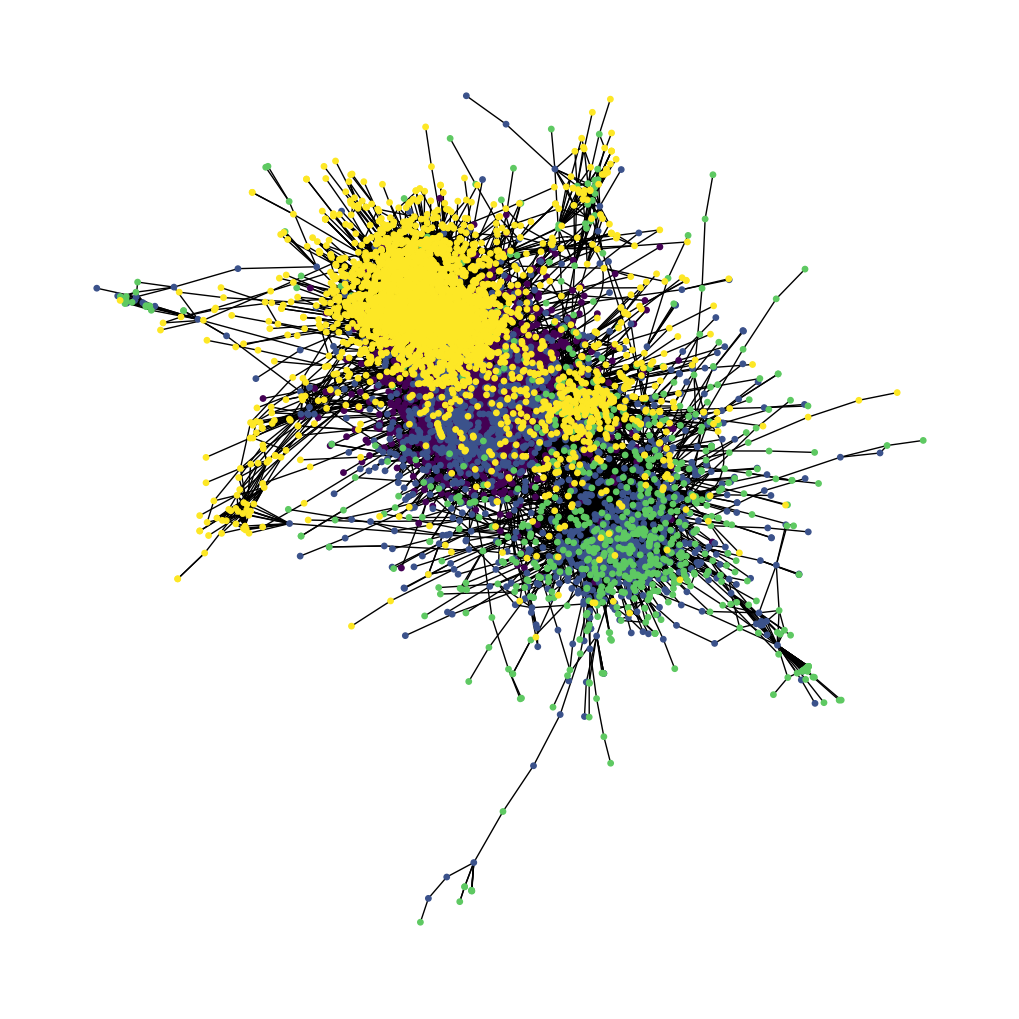

In [25]:
plt.figure(figsize=(10, 10))
colors = wos_paper["Class"].tolist()
wos_graph = nx.from_pandas_edgelist(wos_cites)#.sample(n=1500))
wos_graph = wos_graph.subgraph(sorted(nx.connected_components(wos_graph), key=len, reverse=True)[0])
subjects = list(wos_paper[wos_paper["DOI"].isin(list(wos_graph.nodes))]["Class"])
nx.draw_spring(wos_graph, node_size=15, node_color=subjects)

In [26]:
print(nx.average_clustering(wos_graph))
# print(nx.average_shortest_path_length(wos_graph))
print(max([nx.diameter(wos_graph.subgraph(g).copy()) for g in nx.connected_components(wos_graph)]))
print(nx.average_degree_connectivity(wos_graph))
print(np.average([j for i,j in wos_graph.degree()]))

0.15898084543998434
18
{23: 58.99717673630717, 4: 66.53451742627345, 17: 68.58082445576656, 363: 32.429752066115704, 268: 24.496268656716417, 9: 69.46434037343128, 76: 55.56842105263158, 69: 47.589371980676326, 343: 23.67930029154519, 579: 14.678756476683938, 372: 17.543010752688172, 241: 23.394190871369293, 16: 66.76515151515152, 50: 53.72666666666667, 157: 12.977707006369426, 46: 63.30434782608695, 703: 27.418207681365576, 21: 65.90958408679927, 86: 43.82170542635659, 103: 28.29126213592233, 106: 31.504716981132077, 59: 56.479418886198545, 32: 55.004629629629626, 187: 28.609625668449198, 24: 53.79475308641975, 30: 61.79012345679013, 240: 17.308333333333334, 56: 53.458333333333336, 39: 52.62820512820513, 171: 21.900584795321638, 204: 19.529411764705884, 137: 30.18978102189781, 19: 76.55465587044534, 10: 74.54758620689655, 3: 64.82926829268293, 31: 49.844271412680754, 12: 71.32845188284519, 133: 12.87218045112782, 126: 30.595238095238095, 132: 32.26893939393939, 5: 67.76666666666667, 2

In [27]:
print(len(wos_graph.nodes))
print(len(wos_graph.edges))

9546
52945


In [74]:
train_data, test_data = [], []

for _, group_data in wos_paper.groupby("Class"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.8
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (11133, 39623)
Test data shape: (2666, 39623)


In [75]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

In [76]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="lower right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)



In [77]:
feature_names = set(wos_paper.columns) - {"DOI", "Class"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["Class"]
y_test = test_data["Class"]

In [78]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 39621)]      0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           1427572     ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [79]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
37/37 [==============================] - 15s 249ms/step - loss: 0.0144 - acc: 0.9958 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/300
37/37 [==============================] - 6s 172ms/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/300
37/37 [==============================] - 7s 178ms/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/300
37/37 [==============================] - 7s 178ms/step - loss: 7.9614e-04 - acc: 0.9999 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/300
37/37 [==============================] - 7s 182ms/step - loss: 0.0040 - acc: 0.9999 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/300
37/37 [==============================] - 7s 183ms/step - loss: 0.0043 - acc: 0.9999 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/300
37/37 [==============================] - 7s 185ms/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/300
37/37 [=================

KeyboardInterrupt: 

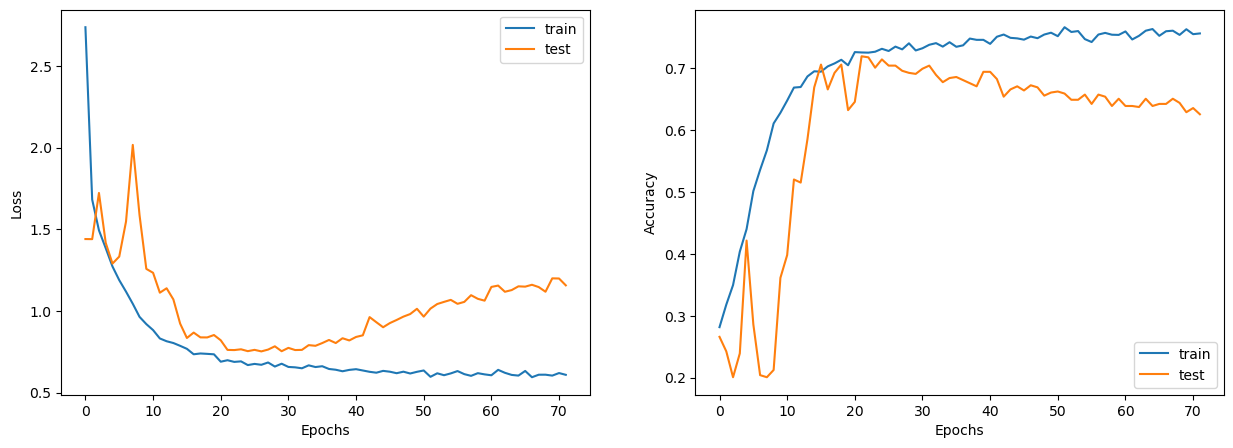

Test accuracy: 70.58%


In [164]:
display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [165]:
def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")


In [166]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 1s 520ms/step
Instance 1:
- E: 18.42%
- M: 56.37%
- N: 13.99%
- S: 11.22%
Instance 2:
- E: 56.57%
- M: 13.88%
- N: 15.66%
- S: 13.89%
Instance 3:
- E: 18.08%
- M: 23.3%
- N: 41.76%
- S: 16.86%
Instance 4:
- E: 34.61%
- M: 25.32%
- N: 25.19%
- S: 14.88%


In [167]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = wos_cites[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    wos_paper.sort_values("DOI")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)


Edges shape: (2, 6600)
Nodes shape: (4955, 4134)


In [168]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [169]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


In [198]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 0.15918604 -0.11336124  0.24730512 -0.04003806]
 [ 0.02382666  0.17735143 -0.1003837   0.10726031]
 [ 0.0011265   0.17025334  0.05634595  0.00474115]], shape=(3, 4), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (4955, 32)                150040    
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (4955, 32)                2368      
                                          

In [199]:
x_train = train_data.DOI.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)


Epoch 1/300
14/14 [==============================] - 13s 536ms/step - loss: 1.5963 - acc: 0.2597 - val_loss: 1.3957 - val_acc: 0.2007
Epoch 2/300
14/14 [==============================] - 6s 462ms/step - loss: 1.4361 - acc: 0.2641 - val_loss: 1.3997 - val_acc: 0.2007
Epoch 3/300
14/14 [==============================] - 6s 449ms/step - loss: 1.3986 - acc: 0.2801 - val_loss: 1.3859 - val_acc: 0.2843
Epoch 4/300
14/14 [==============================] - 6s 423ms/step - loss: 1.3769 - acc: 0.3188 - val_loss: 1.3822 - val_acc: 0.2926
Epoch 5/300
14/14 [==============================] - 6s 411ms/step - loss: 1.3729 - acc: 0.3270 - val_loss: 1.3749 - val_acc: 0.3194
Epoch 6/300
14/14 [==============================] - 5s 392ms/step - loss: 1.3438 - acc: 0.3536 - val_loss: 1.3572 - val_acc: 0.2793
Epoch 7/300
14/14 [==============================] - 5s 383ms/step - loss: 1.3241 - acc: 0.3705 - val_loss: 1.3343 - val_acc: 0.4197
Epoch 8/300
14/14 [==============================] - 5s 379ms/step -

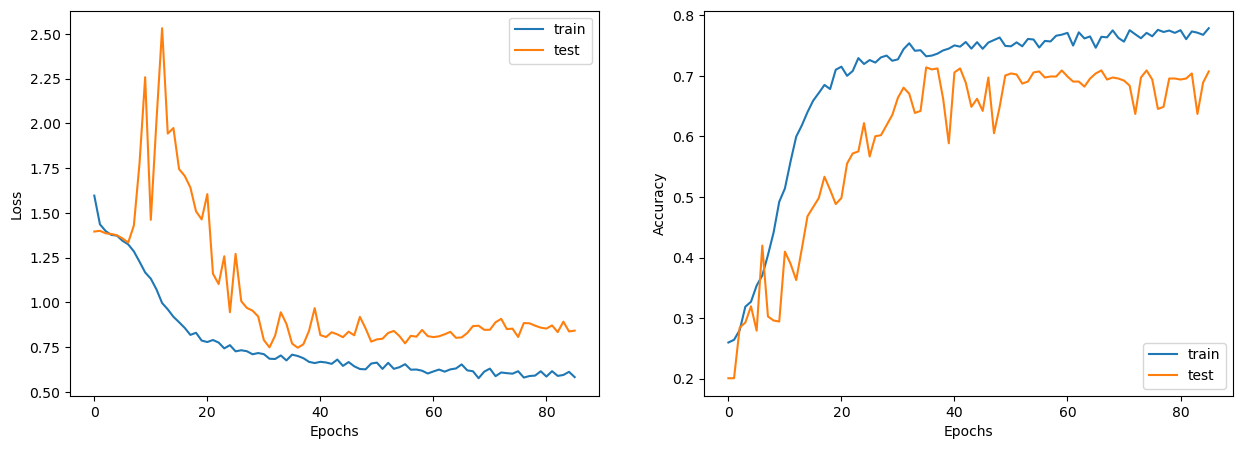

Test accuracy: 69.44%


In [200]:
display_learning_curves(history)
x_test = test_data.DOI.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [173]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding
from stellargraph import StellarGraph


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [174]:
node_features = wos_paper[wos_paper['DOI'].isin(wos_graph.nodes)]
wos = StellarGraph.from_networkx(wos_graph,node_features=node_features.set_index('DOI').drop('Class',axis=1))
print(wos.info())

StellarGraph: Undirected multigraph
 Nodes: 2605, Edges: 6600

 Node types:
  default: [2605]
    Features: float32 vector, length 4134
    Edge types: default-default->default

 Edge types:
    default-default->default: [6600]
        Weights: all 1 (default)
        Features: none


In [175]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(wos)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 660 positive and 660 negative edges. **


In [176]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)



** Sampled 594 positive and 594 negative edges. **


In [177]:
epochs = 40

In [178]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [179]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [180]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)

In [181]:
x_inp, x_out = gcn.in_out_tensors()

In [182]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [183]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [184]:
model = keras.Model(inputs=x_inp, outputs=prediction)

history = model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [185]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 94ms/step - loss: 2.7556 - binary_accuracy: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 2.7333
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 2.7556
	binary_accuracy: 0.5000


In [186]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/40
1/1 - 1s - loss: 2.6314 - binary_accuracy: 0.5000 - val_loss: 0.7243 - val_binary_accuracy: 0.5780 - 1s/epoch - 1s/step
Epoch 2/40
1/1 - 0s - loss: 0.7152 - binary_accuracy: 0.5791 - val_loss: 0.9540 - val_binary_accuracy: 0.6682 - 222ms/epoch - 222ms/step
Epoch 3/40
1/1 - 0s - loss: 1.2521 - binary_accuracy: 0.6532 - val_loss: 1.9680 - val_binary_accuracy: 0.5409 - 231ms/epoch - 231ms/step
Epoch 4/40
1/1 - 0s - loss: 2.1195 - binary_accuracy: 0.5867 - val_loss: 0.9412 - val_binary_accuracy: 0.6939 - 240ms/epoch - 240ms/step
Epoch 5/40
1/1 - 0s - loss: 1.0047 - binary_accuracy: 0.6928 - val_loss: 0.5720 - val_binary_accuracy: 0.8030 - 228ms/epoch - 228ms/step
Epoch 6/40
1/1 - 0s - loss: 0.6374 - binary_accuracy: 0.7912 - val_loss: 0.5182 - val_binary_accuracy: 0.7742 - 228ms/epoch - 228ms/step
Epoch 7/40
1/1 - 0s - loss: 0.5053 - binary_accuracy: 0.7786 - val_loss: 0.5445 - val_binary_accuracy: 0.7394 - 234ms/epoch - 234ms/step
Epoch 8/40
1/1 - 0s - loss: 0.5120 - binary_acc

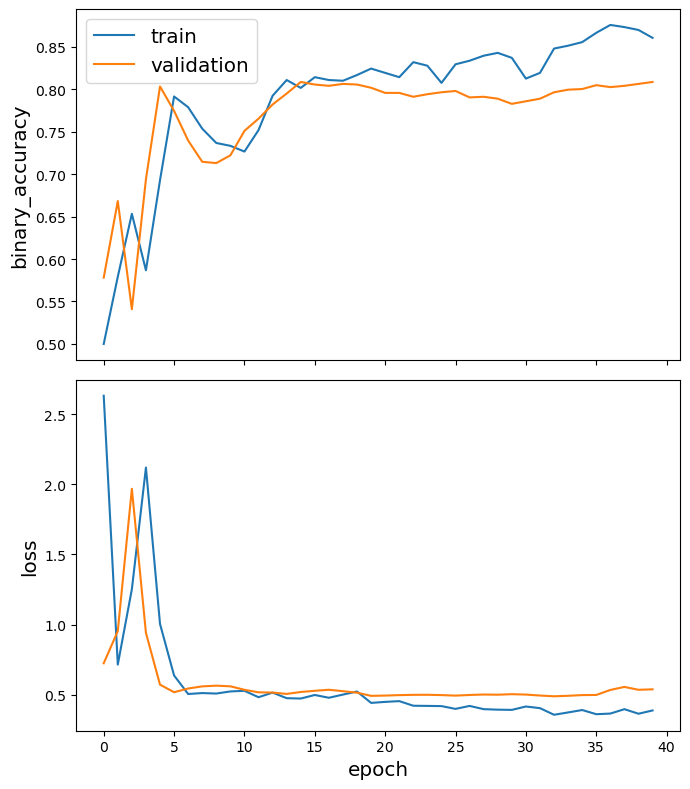

In [187]:
sg.utils.plot_history(history)

In [188]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 101ms/step - loss: 0.5387 - binary_accuracy: 0.8083

Train Set Metrics of the trained model:
	loss: 0.3356
	binary_accuracy: 0.8939

Test Set Metrics of the trained model:
	loss: 0.5387
	binary_accuracy: 0.8083


## TSNE

In [189]:
import dgl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from dgl.nn import GraphConv
import torch.nn.functional as F
import numpy as np
from sklearn.manifold import TSNE

In [190]:
display(wos_paper)

,DOI,Class,learning,development,represents,direction,research,computational,capabilities,resulting,...,moderated,interwoven,topographically,representatives,transferability,discriminant,employ,autonomously,safety,formally
0,1869,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,757,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2402,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1026,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,641,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,2520,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4951,4087,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4952,2458,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4953,1212,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
subset = wos_paper[wos_paper['DOI'].isin(wos_graph.nodes)]
# node_features = tf.cast(
#     subset.sort_values("DOI")[feature_names].to_numpy(), dtype=tf.dtypes.float32
# )
node_features = subset.drop(['DOI','Class'],axis=1)
node_labels = subset['Class']
n_features = node_features.shape[0]
# node_labels = wos_paper[wos_paper['DOI'].isin(list(wos_graph.nodes))].sort_values('DOI')['Class']
n_labels = int(node_labels.max() + 1)

In [192]:
# perform TSNE and visualize
tsne = TSNE(n_components=2)
tsne_res = tsne.fit_transform(node_features)


C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [193]:
display(wos_paper)
print(node_features)
print(node_labels)

,DOI,Class,learning,development,represents,direction,research,computational,capabilities,resulting,...,moderated,interwoven,topographically,representatives,transferability,discriminant,employ,autonomously,safety,formally
0,1869,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,757,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2402,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1026,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,641,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,2520,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4951,4087,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4952,2458,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4953,1212,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


      learning  development  represents  direction  research  computational  \
0          0.0          0.0         0.0        0.0       0.0            0.0   
1          0.0          1.0         0.0        0.0       0.0            0.0   
3          1.0          0.0         0.0        0.0       0.0            0.0   
4          1.0          0.0         0.0        0.0       0.0            0.0   
6          0.0          0.0         0.0        0.0       0.0            0.0   
...        ...          ...         ...        ...       ...            ...   
4945       0.0          0.0         0.0        0.0       0.0            0.0   
4946       0.0          0.0         0.0        0.0       0.0            0.0   
4947       0.0          0.0         0.0        0.0       0.0            0.0   
4951       0.0          0.0         0.0        0.0       0.0            0.0   
4952       0.0          0.0         0.0        0.0       0.0            0.0   

      capabilities  resulting  increasing  sophisti

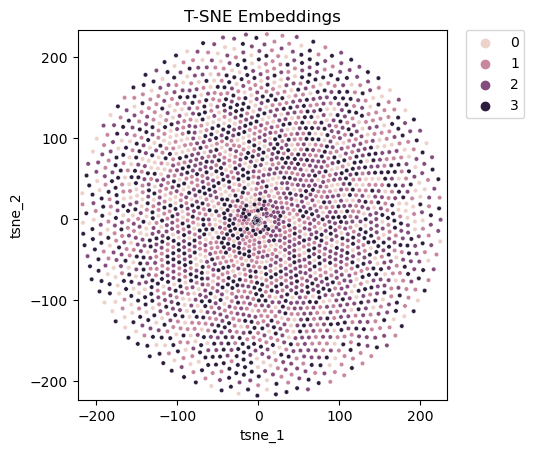

In [194]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_res[:,0], 'tsne_2': tsne_res[:,1], 'label': node_labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_res.min()-5, tsne_res.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_title('T-SNE Embeddings')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)